In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


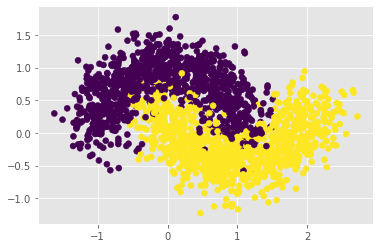

In [202]:
from sklearn.datasets import make_moons
plt.style.use('ggplot')
moon=make_moons(n_samples=2000,noise=0.25)
plt.scatter(moon[0][:,0],moon[0][:,1],c=moon[1])

In [203]:
from sklearn.model_selection import train_test_split
X=moon[0]
y=moon[1]
X_train,X_test,y_train,y_test=train_test_split(moon[0],moon[1],test_size=0.1)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(1,-1)
y_test=y_test.reshape(1,-1)
print(X_train.shape)
print(y_train.shape)

(2, 1800)
(1, 1800)


In [204]:
def initialize_parameters_deep(layer_dims):  # [5,4,7,2] input 5, hidden 4 7 , output 2  number of neuron
    parameters = {}
    L=len(layer_dims) #num of layer
    
    for i in range(1,L):
        parameters['W'+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*1
        parameters['b'+str(i)]=np.zeros((layer_dims[i],1))
    
    return parameters
    

In [205]:
def linear_forward(A,W,b):  #for 1 layer
    Z=np.dot(W,A)+b
    cache=(A,W,b)
    
    
    return Z,cache

In [206]:
def linear_activation_forward(A_prev,W,b,activation):
        if activation =="sigmoid":
            Z,linear_cache=linear_forward(A_prev,W,b)
            A,activation_cache=1/(1+np.exp(-Z)),Z
        
        elif activation == "relu":
            Z,linear_cache=linear_forward(A_prev,W,b)
            A,activation_cache=np.maximum(Z,0),Z
        
        cache=(linear_cache,activation_cache)
        
        return A,cache

In [207]:
def L_model_forward(X,parameters):
    caches=[]
    A=X
    L=len(parameters)//2 # Total layer = len(layer_dims)
    
    for i in range(1,L):
        A_prev=A
        A,cache=linear_activation_forward(A_prev,parameters['W'+str(i)],parameters['b'+str(i)],'relu')
        caches.append(cache)
    
    AL,cache=linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    
        
    return AL,caches

In [208]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost=-1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost=np.squeeze(cost)
    return cost

In [209]:
def linear_backward(dZ,cache):
    A_prev,W,b=cache
    m=A_prev.shape[1]
    
    dW=1/m*np.dot(dZ,A_prev.T)
    db=1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.dot(W.T , dZ)
    
    
    return dA_prev,dW,db

In [210]:
def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache =cache
    
    if activation =='relu':

        dZ=dA.copy()
        dZ[dZ<0]=0
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
        
    elif activation =='sigmoid':
        dc=dA.copy()
        dZ=dc*(1/(1+np.exp(-1*activation_cache)))*(1-1/(1+np.exp(-1*activation_cache)))
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    
    return dA_prev,dW,db


In [211]:
def L_model_backward(AL,Y,caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache=caches[L-1]
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)]=linear_activation_backward(dAL,current_cache,'sigmoid')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    
    return grads

In [212]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    
    for i in range(L):
        parameters["W"+str(i+1)]-=learning_rate*grads["dW"+str(i+1)]
        parameters["b"+str(i+1)]-=learning_rate*grads["db"+str(i+1)]
    
    return parameters
        

In [213]:
def deep_L_layer_NN(X,Y,layers_dims,learning_rate=0.0001,num_iterations=3000,print_score=True):
    costs=[]
    parameters=initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL,caches=L_model_forward(X,parameters)
        cost=compute_cost(AL,Y)
        grads=L_model_backward(AL,Y,caches)
        parameters=update_parameters(parameters,grads,learning_rate)

        
        if print_score and i%100 ==0:
            print('Cost After Iteration {} : {:.6f}'.format(i,cost))
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration')
    plt.title('Learning rate ='+str(learning_rate))
    plt.show()
    
    return parameters

In [214]:
def predict (parameters,X):
    AL,cache=L_model_forward(X,parameters)
    prediction=(AL>0.5)
    
    return prediction

Cost After Iteration 0 : 1.629096
Cost After Iteration 100 : 0.693145
Cost After Iteration 200 : 0.693145
Cost After Iteration 300 : 0.693145
Cost After Iteration 400 : 0.693145
Cost After Iteration 500 : 0.693145
Cost After Iteration 600 : 0.693145
Cost After Iteration 700 : 0.693145
Cost After Iteration 800 : 0.693145
Cost After Iteration 900 : 0.693145
Cost After Iteration 1000 : 0.693145
Cost After Iteration 1100 : 0.693145
Cost After Iteration 1200 : 0.693145
Cost After Iteration 1300 : 0.693145
Cost After Iteration 1400 : 0.693145
Cost After Iteration 1500 : 0.693145
Cost After Iteration 1600 : 0.693145
Cost After Iteration 1700 : 0.693145
Cost After Iteration 1800 : 0.693145
Cost After Iteration 1900 : 0.693145


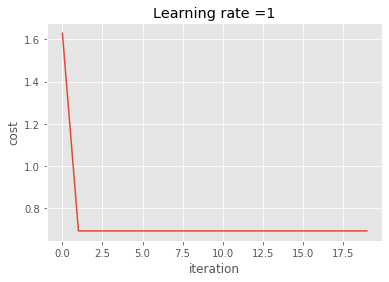

In [215]:
parameters=deep_L_layer_NN(X_train,y_train,[2,15,15,2,1],learning_rate=1,num_iterations=2000,print_score=True)

In [216]:
prediction=predict(parameters,X_train)
prediction2=predict(parameters,X_test)
print('train score : ',100-np.sum(np.abs((y_train-prediction.astype(int))))/y_train.shape[1]*100)
print('test score : ',100-np.sum(np.abs((y_test-prediction2.astype(int))))/y_test.shape[1]*100)

train score :  50.111111111111114
test score :  49.0


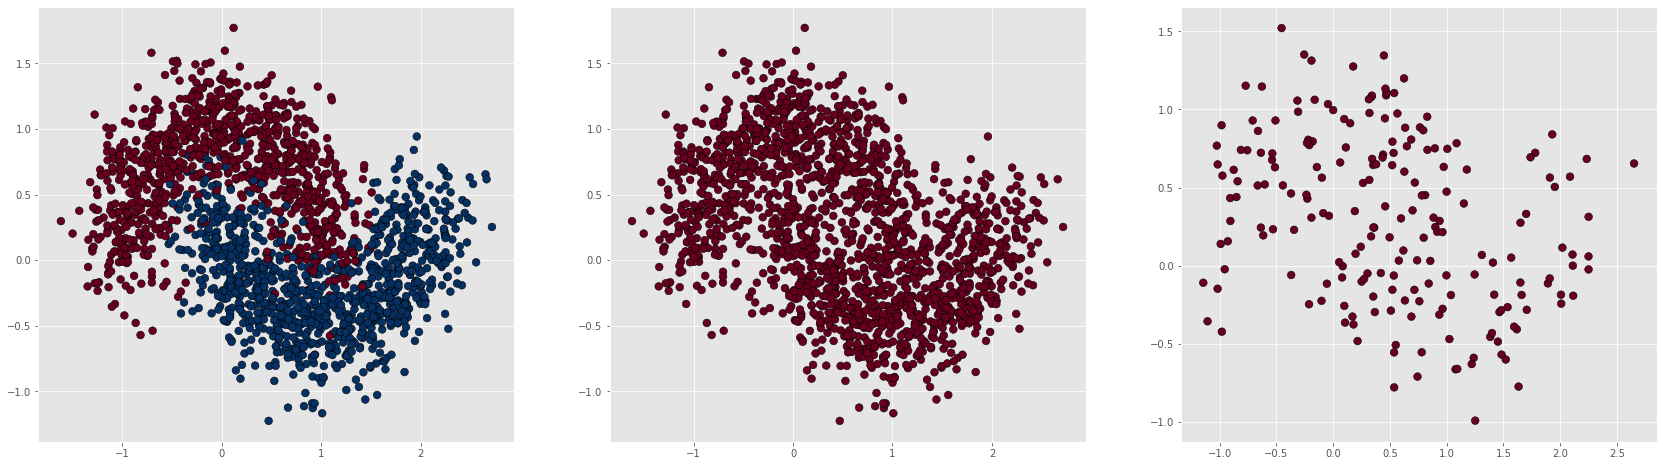

In [217]:
fig,axes=plt.subplots(1,3,figsize=(29,8))
axes[0].scatter(X[:,0],X[:,1],c=y,cmap='RdBu',edgecolor='k',s=60)
axes[1].scatter(X_train.T[:,0],X_train.T[:,1],c=np.squeeze(prediction),cmap='RdBu',edgecolor='k',s=60)
axes[2].scatter(X_test.T[:,0],X_test.T[:,1],c=np.squeeze(prediction2),cmap='RdBu',edgecolor='k',s=60)

(2, 1800)